In [ ]:
import pandas as pd
df = pd.read_csv("/home/austin/20220831_final_results.csv")
df = df.set_axis(['tool', 'program_set', 'seed', 'campaign', 'violation', 'direct', 'config1', 'config2', 'partial_order','program'], axis=1)
df = df[(df['seed'] == "NONE") | (df['seed'] == "18331")]
(df := df[~(df.partial_order.str.contains('NO_STRING_CONSTANT'))])
((filtered := df[df.tool == 'doop'].partial_order.str.split('/', expand=True))[1] + "/" + filtered[3]).unique()

In [62]:
df[(df['seed'] == 'NONE') & (df['tool'] != 'doop') & ~(df['program'].str.contains('eclipse'))]

,tool,program_set,seed,campaign,violation,direct,config1,config2,partial_order,program,option,full
0,flowdroid,fossdroid,NONE,campaign0,VIOLATION,DIRECT,55e6b594c1ab857279a1a5fe323ba293,d77ad34803ce01c77e208f04a843908e,cgalgo/VTA/MPT/RTA,com.angrydoughnuts.android.alarmclock_15-relea...,cgalgo,False
1,flowdroid,fossdroid,NONE,campaign0,VIOLATION,DIRECT,d77ad34803ce01c77e208f04a843908e,55e6b594c1ab857279a1a5fe323ba293,cgalgo/RTA/MST/VTA,com.angrydoughnuts.android.alarmclock_15-relea...,cgalgo,False
4,soot,dacapo-2006,NONE,campaign0,VIOLATION,DIRECT,8ee4eef1af6e08c6412d884ddaac3a78,b566c78bae508c8eb020ab6501c2ead8,vta/true/MPT/false/false/MST/true,antlr.jar.json,vta,False
5,soot,dacapo-2006,NONE,campaign0,VIOLATION,DIRECT,8ee4eef1af6e08c6412d884ddaac3a78,b566c78bae508c8eb020ab6501c2ead8,vta/true/MPT/false/false/MST/true,bloat.jar.json,vta,False
6,soot,dacapo-2006,NONE,campaign0,VIOLATION,DIRECT,8ee4eef1af6e08c6412d884ddaac3a78,b566c78bae508c8eb020ab6501c2ead8,vta/true/MPT/false/false/MST/true,chart.jar.json,vta,False
...,...,...,...,...,...,...,...,...,...,...,...,...
325,soot,cats-microbenchmark,NONE,campaign0,VIOLATION,DIRECT,a5958fa368d75f0f7577161a659d0b48,b566c78bae508c8eb020ab6501c2ead8,rta/true/MPT/false/false/MST/true,TMR4.jar.json,rta,False
326,soot,cats-microbenchmark,NONE,campaign0,VIOLATION,DIRECT,a5958fa368d75f0f7577161a659d0b48,b566c78bae508c8eb020ab6501c2ead8,rta/true/MPT/false/false/MST/true,MR4.jar.json,rta,False
327,soot,cats-microbenchmark,NONE,campaign0,VIOLATION,DIRECT,a5958fa368d75f0f7577161a659d0b48,b566c78bae508c8eb020ab6501c2ead8,rta/true/MPT/false/false/MST/true,MR6.jar.json,rta,False
328,soot,cats-microbenchmark,NONE,campaign0,VIOLATION,DIRECT,a5958fa368d75f0f7577161a659d0b48,b566c78bae508c8eb020ab6501c2ead8,rta/true/MPT/false/false/MST/true,CFNE2.jar.json,rta,False


In [49]:
transform = df.replace({'cats-microbenchmark':'microbenchmark','droidbench':'microbenchmark','dacapo-2006':'real-world','fossdroid':'real-world'})
pvt = pd.pivot_table(transform, index='program_set', values='partial_order', columns=['tool'], aggfunc=lambda x: len(x.unique()), margins=True)
pvt

tool,doop,flowdroid,soot,wala,All
program_set,,,,,
microbenchmark,NaN,28.0,3.0,NaN,31
real-world,12.0,9.0,18.0,9.0,48
All,12.0,35.0,18.0,9.0,74


In [50]:
pvt = pd.pivot_table(transform[transform.seed == 'NONE'], index='program_set', values='partial_order', columns=['tool'],
                     aggfunc=lambda x: len(x.unique()), margins=True)
pvt

tool,doop,flowdroid,soot,wala,All
program_set,,,,,
microbenchmark,NaN,26.0,3.0,NaN,29
real-world,12.0,2.0,18.0,6.0,38
All,12.0,28.0,18.0,6.0,64


In [51]:
df[(df.tool == 'wala') & (df.program_set == 'dacapo-2006')].partial_order.unique()

array(['cgalgo/NOBJ/MPT/ZEROONE_CFA/ZEROONE_CFA/MST/NOBJ',
       'reflectionSetting/NO_FLOW_TO_CASTS/MST/NO_FLOW_TO_CASTS_NO_METHOD_INVOKE/NO_FLOW_TO_CASTS_NO_METHOD_INVOKE/MPT/NO_FLOW_TO_CASTS',
       'reflectionSetting/NO_FLOW_TO_CASTS/MST/STRING_ONLY/STRING_ONLY/MPT/NO_FLOW_TO_CASTS',
       'cgalgo/NCFA/MPT/ZEROONE_CFA/ZEROONE_CFA/MST/NCFA',
       'reflectionSetting/FULL/MST/NO_METHOD_INVOKE/NO_METHOD_INVOKE/MPT/FULL',
       'reflectionSetting/FULL/MST/APPLICATION_GET_METHOD/APPLICATION_GET_METHOD/MPT/FULL',
       'reflectionSetting/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD/MST/STRING_ONLY/STRING_ONLY/MPT/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD',
       'reflectionSetting/STRING_ONLY/MST/NONE/NONE/MPT/STRING_ONLY',
       'reflectionSetting/NO_FLOW_TO_CASTS/MST/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD/NO_FLOW_TO_CASTS_APPLICATION_GET_METHOD/MPT/NO_FLOW_TO_CASTS'],
      dtype=object)

In [52]:
transform[(transform['seed'] == 'NONE') & (transform.campaign.str.startswith('full'))]

,tool,program_set,seed,campaign,violation,direct,config1,config2,partial_order,program


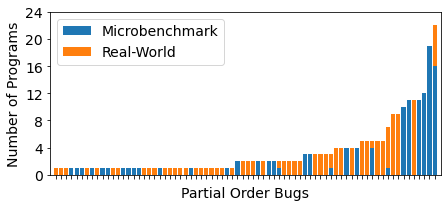

In [59]:
import matplotlib.pyplot as plt
plt.close("all")

plt.rc("font", size=14)

fig, ax = plt.subplots(figsize=(7,3))

to_plot = df[["partial_order","program_set"]]
to_plot = to_plot.replace({"cats-microbenchmark":"microbenchmark","fossdroid":"real_world","droidbench":"microbenchmark","dacapo-2006":"real_world"})
pvt = to_plot.pivot_table(index="partial_order", columns="program_set", values="partial_order", aggfunc=lambda x: len(x)).fillna(0)
pvt['total'] = pvt.microbenchmark + pvt.real_world
pvt = pvt.sort_values('total')
pvt

ax.bar(pvt.index, pvt.microbenchmark, label="Microbenchmark")
ax.bar(pvt.index, pvt.real_world, bottom=pvt.microbenchmark, label="Real-World")

ax.set_xticklabels("")
ax.set_yticks(range(0, 28, 4))
ax.set_xlabel("Partial Order Bugs")
ax.set_ylabel("Number of Programs")
ax.legend()
plt.margins(x=0.01)
plt.show()

fig.savefig("/home/austin/git/ECSTATIC_paper/figs/programs_vs_partial_orders.pdf", format='pdf')

In [54]:
df['option'] = df['partial_order'].str.split('/', expand=True)[0]
df.pivot_table(index='tool', values='option', aggfunc=pd.Series.nunique)

,option
tool,
doop,1
flowdroid,15
soot,18
wala,2


In [55]:
df['full'] = df.campaign.str.startswith('full')
x = df
x.pivot_table(index='partial_order', columns='full', aggfunc=lambda x: x.unique())

campaign  \
full                                                                                   False   
partial_order                                                                                  
aliasflowins/FALSE/MST/TRUE                                                      [campaign0]   
aliasflowins/TRUE/MPT/FALSE                                                      [campaign0]   
analysis/1-call-site-sensitive+heap/MPT/1-call-...                               [campaign0]   
analysis/1-object-1-type-sensitive+heap/MPT/1-o...                               [campaign0]   
analysis/1-object-1-type-sensitive+heap/MPT/1-t...                               [campaign0]   
...                                                                                      ...   
taintwrapper/NONE/MPT/DEFAULTFALLBACK               [campaign887, campaign950, campaign1654]   
taintwrapper/NONE/MPT/EASY                                                     [campaign219]   
throw-analysis/pedantic/MST/unit/unit/MPT/pedantic                               [campaign0]   
trim-clinit/true/MPT/false/false/MST/true                                        [campaign0]   
vta/true/MPT/false/false/MST/true                                                [campaign0]   

                                                                                                       \
full                                                                                             True   
partial_order                                                                                           
aliasflowins/FALSE/MST/TRUE                                                                       NaN   
aliasflowins/TRUE/MPT/FALSE                                                                       NaN   
analysis/1-call-site-sensitive+heap/MPT/1-call-...                                                NaN   
analysis/1-object-1-type-sensitive+heap/MPT/1-o...                                                NaN   
analysis/1-object-1-type-sensitive+heap/MPT/1-t...                                                NaN   
...                                                                                               ...   
taintwrapper/NONE/MPT/DEFAULTFALLBACK               [full_campaign17, full_campaign36, full_campai...   
taintwrapper/NONE/MPT/EASY                          [full_campaign9, full_campaign17, full_campaig...   
throw-analysis/pedantic/MST/unit/unit/MPT/pedantic                                                NaN   
trim-clinit/true/MPT/false/false/MST/true                                                         NaN   
vta/true/MPT/false/false/MST/true                                                                 NaN   

                                                                                              config1  \
full                                                                                            False   
partial_order                                                                                           
aliasflowins/FALSE/MST/TRUE                                        [3c2c6c9d6e896c028463ca607b7fce7a]   
aliasflowins/TRUE/MPT/FALSE                                        [8f0cf1475ff0a90d31e8c21a00731724]   
analysis/1-call-site-sensitive+heap/MPT/1-call-...                 [08cebea8fa598131837b07434610656f]   
analysis/1-object-1-type-sensitive+heap/MPT/1-o...                 [c5d5e8f931addce9d673c0412464cef3]   
analysis/1-object-1-type-sensitive+heap/MPT/1-t...                 [c5d5e8f931addce9d673c0412464cef3]   
...                                                                                               ...   
taintwrapper/NONE/MPT/DEFAULTFALLBACK               [dc022f21581b7a65c5d5aebba06a2e21, 166f158afac...   
taintwrapper/NONE/MPT/EASY                                         [166f158afacefe324f7009d5c4da1c81]   
throw-analysis/pedantic/MST/unit/unit/MPT/pedantic                 [b566c78bae508c8eb020ab6501c2ead8]   
trim-cli